Below:

*   Load the csvs into dataframes
*   Get some info about the dataframes e.g., orders.info()





In [2]:
import pandas as pd

# orderlines.csv
url = 'https://drive.google.com/file/d/14Y7g5ITyf6LMyPoKc9wr010V9StaCUux/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

# orders.csv
url = 'https://drive.google.com/file/d/1BLEHcP-9fm9Rv7A01H3co2XBMnSr66YC/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

# brands.csv
url = 'https://drive.google.com/file/d/1BrNrIY0F1LbyXtyaQygUBXVxQGB3JBqx/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

# products.csv
url = 'https://drive.google.com/file/d/1UfsHI80cpQqGfsH2g4T4Tsw8cWayOfzC/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

Explore the Data - to do: 
- check for needed transformations of datatype
- check for rearrangement of columns
- check for duplicates
- check for missing values
- check if there are missing values coded as NA or as empty string "-"

# Table: Orderlines

In [ ]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


--> unit price not  numeric: transform

--> date also text: transform

In [ ]:
orderlines.head(20)

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
5,1119114,295310,0,10,WDT0249,231.79,2017-01-01 01:14:27
6,1119115,299544,0,1,APP1582,1.137.99,2017-01-01 01:17:21
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
9,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11


--> product_id always 0: delete column?

In [3]:
dupl_orderlines = orderlines.duplicated()
print(dupl_orderlines.value_counts())

#other way: 
orderlines.duplicated().sum()

False    293983
dtype: int64


In [ ]:
orderlines.isna().any()

id                  False
id_order            False
product_id          False
product_quantity    False
sku                 False
unit_price          False
date                False
dtype: bool

In [ ]:
orderlines.tail(20)

,id,id_order,product_id,product_quantity,sku,unit_price,date
293963,1650178,527385,0,1,APP0927,13.99,2018-03-14 13:49:21
293964,1650180,527386,0,1,APP1922,161.00,2018-03-14 13:49:48
293965,1650181,527387,0,1,APP0698,9.99,2018-03-14 13:50:06
293966,1650183,527388,0,1,TPL0025,14.99,2018-03-14 13:51:59
293967,1650184,527389,0,1,APP0698,9.99,2018-03-14 13:52:15
293968,1650186,525853,0,1,OWC0035-2,71.89,2018-03-14 13:52:18
293969,1650187,527390,0,1,APP0698,9.99,2018-03-14 13:52:33
293970,1650189,527391,0,1,SAT0008,49.99,2018-03-14 13:53:31
293971,1650190,527392,0,1,ZAG0024,34.99,2018-03-14 13:53:44
293972,1650191,527393,0,1,ELA0026,13.99,2018-03-14 13:53:57


In [ ]:
orderlines.product_quantity.value_counts()

1      277058
2       12711
3        1728
4        1251
5         343
        ...  
97          1
98          1
70          1
126         1
54          1
Name: product_quantity, Length: 67, dtype: int64

In [ ]:
orderlines.nlargest(20, 'product_quantity')

,id,id_order,product_id,product_quantity,sku,unit_price,date
53860,1228150,346221,0,999,APP1190,55.99,2017-04-14 21:50:52
68712,1254032,358747,0,999,SEV0028,19.99,2017-05-24 14:51:58
57796,1234924,349475,0,800,KIN0137,7.49,2017-04-25 09:59:00
57306,1234111,349133,0,555,APP0665,70.99,2017-04-24 10:20:13
40813,1204788,335057,0,201,THU0029,80.99,2017-03-14 15:25:53
136675,1388261,417536,0,200,TRK0009,29.99,2017-10-25 15:02:39
204637,1500715,464858,0,192,APP1662,519.00,2017-12-17 15:53:04
246048,1574262,496172,0,164,EVU0013,19.99,2018-01-22 16:14:42
27779,1180010,323959,0,126,ADN0039,34.99,2017-02-14 10:21:12
285492,1637611,522075,0,125,XDO0047,25.99,2018-03-06 10:07:54


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3214343350>,
      dtype=object)

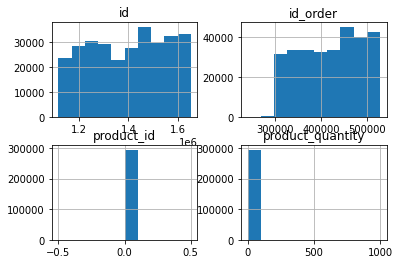

In [ ]:
#orderlines.loc[orderlines['product_quantity'] < 200000 & orderlines[] :].hist()

In [ ]:
orderlines['date'].max()

'2018-03-14 13:58:36'

In [ ]:
orderlines['date'].min()

'2017-01-01 00:07:19'

# Table: Orders

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


--> created date is text:

In [ ]:
orders.head(20)

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
7,245851,2017-04-04 20:58:21,79.99,Pending
8,245941,2017-01-01 10:32:23,183.52,Completed
9,246018,2017-02-13 23:02:57,211.95,Completed


In [ ]:
dupl_orders = orders.duplicated()
print(dupl_orders.value_counts())

False    226909
dtype: int64


In [ ]:
orders.isna().any()
# other way: 
# orders.isna().sum()

order_id        False
created_date    False
total_paid       True
state           False
dtype: bool

In [ ]:
orders.total_paid.isna().sum()

5

## --> fünf fehlende Werte: ausschließen? 

In [ ]:
orders.tail(20)

,order_id,created_date,total_paid,state
226889,527382,2018-03-14 13:47:43,0.00,Shopping Basket
226890,527383,2018-03-14 13:48:51,9.99,Shopping Basket
226891,527384,2018-03-14 13:49:11,249.99,Place Order
226892,527385,2018-03-14 13:49:21,13.99,Shopping Basket
226893,527386,2018-03-14 13:49:48,161.00,Place Order
226894,527387,2018-03-14 13:50:06,9.99,Shopping Basket
226895,527388,2018-03-14 13:51:59,34.98,Shopping Basket
226896,527389,2018-03-14 13:52:15,9.99,Shopping Basket
226897,527390,2018-03-14 13:52:33,9.99,Shopping Basket
226898,527391,2018-03-14 13:57:54,54.98,Pending


In [ ]:
orders.describe()

,order_id,total_paid
count,226909.000000,226904.000000
mean,413296.482480,569.225818
std,65919.250331,1761.778002
min,241319.000000,0.000000
25%,356263.000000,34.190000
50%,413040.000000,112.990000
75%,470553.000000,525.980000
max,527401.000000,214747.530000


In [ ]:
orders.total_paid.sort_values(ascending=False)

96028     214747.53
2478      214746.63
183927    214714.31
61659     214642.47
40557     214517.58
            ...    
127701          NaN
132013          NaN
147316          NaN
148833          NaN
149434          NaN
Name: total_paid, Length: 226909, dtype: float64

In [ ]:
orders.state.value_counts()

Shopping Basket    117809
Completed           46605
Place Order         40883
Pending             14379
Cancelled            7233
Name: state, dtype: int64

In [ ]:
orders.query('total_paid' ')

AttributeError: ignored

--> outliers, diese ausschließen? 

In [ ]:
orders.nlargest(20, 'total_paid')

,order_id,created_date,total_paid,state
96028,395611,2017-09-01 20:56:34,214747.53,Shopping Basket
2478,301934,2017-01-03 19:27:13,214746.63,Shopping Basket
183927,484334,2018-01-07 15:58:26,214714.31,Shopping Basket
61659,361200,2017-06-01 11:55:02,214642.47,Shopping Basket
40557,340045,2017-03-28 13:27:52,214517.58,Shopping Basket
32296,331780,2017-03-03 22:29:21,159989.83,Shopping Basket
188457,488935,2018-01-11 21:11:34,121521.85,Shopping Basket
59492,359031,2017-05-25 12:14:22,117633.68,Shopping Basket
67674,367220,2017-06-19 17:42:14,101887.33,Shopping Basket
59208,358747,2017-05-24 14:51:58,100738.45,Shopping Basket


In [ ]:
orders.nsmallest(20, 'total_paid')

,order_id,created_date,total_paid,state
150,296010,2017-01-09 23:47:00,0.0,Completed
264,299605,2017-01-01 10:33:46,0.0,Shopping Basket
308,299651,2017-01-01 12:23:58,0.0,Shopping Basket
377,299731,2017-01-01 14:52:18,0.0,Shopping Basket
380,299734,2017-01-01 14:55:20,0.0,Shopping Basket
412,299767,2017-01-01 16:12:41,0.0,Shopping Basket
434,299790,2017-01-01 17:03:53,0.0,Place Order
439,299796,2017-01-01 17:08:48,0.0,Shopping Basket
468,299827,2017-01-01 17:46:00,0.0,Shopping Basket
478,299839,2017-01-01 18:07:11,0.0,Shopping Basket


# Table: brands

In [ ]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [ ]:
brands

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio
...,...,...
182,XOO,Xoopar
183,XRI,X-Rite
184,XTO,Xtorm
185,ZAG,ZaggKeys


In [ ]:
dupl_brands = brands.duplicated()
print(dupl_brands.value_counts())

False    187
dtype: int64


In [ ]:
brands.isna().any()

short    False
long     False
dtype: bool

In [ ]:
brands.nunique()

short    187
long     181
dtype: int64

# Table: products

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


--> price and promo_price not numeric: transform

In [ ]:
products.head(30)

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364
5,APP0073,Apple Composite AV Cable iPhone and iPod white,IPhone and iPod AV Cable Dock to Composite Video.,45,420.003,0,1230
6,KIN0008,Mac Memory Kingston 1GB 667MHz DDR2 SO-DIMM,1GB RAM Mac mini and iMac (2006/07) MacBook Pr...,18.99,146.471,0,1364
7,KIN0009,Mac Memory Kingston 2GB 800MHz DDR2 SO-DIMM,2GB RAM iMac with Intel Core 2 Duo (Penryn).,36.99,274.694,0,1364
8,KIN0001-2,Mac memory Kingston 4GB (2x2GB) 667MHz DDR2 SO...,RAM 4GB (2x2GB) Mac mini and iMac (2006/07) Ma...,74,669.904,0,1364
9,APP0100,Apple Adapter Mini Display Port to VGA,Adapter Mini Display Port to VGA MacBook and M...,35,330.003,0,1325


In [ ]:
products.tail(30)

,sku,name,desc,price,promo_price,in_stock,type
19296,REP0422,Headphone Input repair iPhone 7,Repair service including parts and labor for i...,6.999.003,69.99,0,"1,44E+11"
19297,REP0425,iPhone repair microphone 7,Repair service including parts and labor for i...,6.999.003,69.99,0,"1,44E+11"
19298,REP0428,iPhone Speaker lower repair 7,Repair service including parts and labor for i...,599.906,599.906,0,"1,44E+11"
19299,REP0405,iPhone battery repair 7 plus,Repair service including parts and labor for i...,49.99,499.899,0,"1,44E+11"
19300,REP0412,Rear Camera Repair iPhone 7 Plus,It is including parts and labor for iPhone 7 Plus,119.99,1.199.897,0,"1,44E+11"
19301,REP0415,Front Camera Repair iPhone 7 Plus,Repair service including parts and labor for i...,6.999.003,69.99,0,"1,44E+11"
19302,REP0420,Repair iPhone charging connector 7 Plus,Repair service including parts and labor for i...,6.999.003,69.99,0,"1,44E+11"
19303,AP20472,Like new - Apple charging cable 2m USB-C,Apple USB-C Cable 2 meters Refurbished MacBook,25,200.001,0,1325
19304,REP0423,iPhone Earphones jack repair 7 plus,Repair service including parts and labor for i...,6.999.003,69.99,0,"1,44E+11"
19305,REP0426,iPhone repair microphone 7 Plus,Repair service including parts and labor for i...,6.999.003,69.99,0,"1,44E+11"


In [ ]:
dupl_products = products.duplicated()
print(dupl_products.value_counts())

False    10580
True      8746
dtype: int64


--> a lot of duplicates in products actually. Why? 

In [ ]:
products.isna().any()

sku            False
name           False
desc            True
price           True
promo_price    False
in_stock       False
type            True
dtype: bool

In [ ]:
products.desc.isna().sum()

7

In [ ]:
products.price.isna().sum()

46

In [ ]:
products.type.isna().sum()

50

In [ ]:
products.in_stock.value_counts()

0    17208
1     2118
Name: in_stock, dtype: int64

In [ ]:
products.nunique()

sku            10579
name           10373
desc            7098
price           2690
promo_price     4614
in_stock           2
type             126
dtype: int64